# Machine Learning - Hierarchical Clustering
Hierarchical Clustering is a type of unsupervised machine learning that groups similar data points into clusters by building a tree-like structure.

Think of it like making a family tree of data points — where similar ones are grouped together step by step.

In [49]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [50]:
# Reading dataset from url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df = pd.read_csv(url, sep=r'\s+', header = None)
df


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Data Exploration

In [51]:
# Checking the first 6 rows of Dataset
df.head(6)


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [52]:
# Checking last 5 rows of the Dataset
df.tail(5)


,0,1,2,3,4,5,6,7
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [53]:
# Checking total rows and columns in our data
df.shape


(210, 8)

In [54]:
# Checkimg the total non - null values and the columns datatype in our dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


## 2. Statistical Analysis

In [55]:
# Checking all the important Stats
df.describe()


,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## 3. Selecting Features

In [56]:
# This dataset has no labels so we will use iloc to removethe last column and use all others
x = df.iloc[ : , : -1]
x


,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


## 4. Scaling

In [57]:
# Scaling the columns as some columns values might be bigger than other columns
scaler = StandardScaler()
xScaled = scaler.fit_transform(x)
xScaled


array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

## 5. Linkage

In [58]:
# Ward’s method groups points so that the total difference (variance) within each group is as small as possible.
# It keeps the clusters tight and clean.

linked = linkage(xScaled, method= 'ward')


## 6. Dendrogram

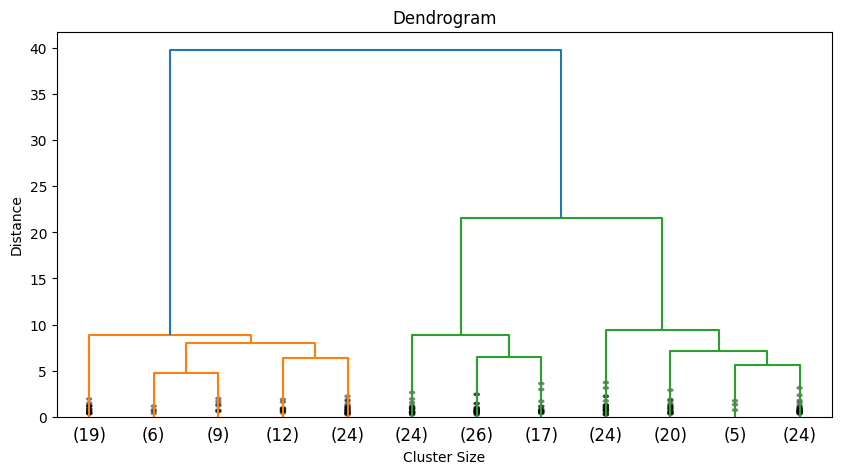

In [59]:
# Visualizing a Dendrogram
# Deciding figure size
plt.figure(figsize = (10, 5))

# truncate_mode='lastp'
# This tells the dendrogram to not show the full tree (especially useful if you have a lot of data points).
# p = 12, This means: only show the last 12 clusters.
# show_contracted=True
# show_contracted=True, If the dendrogram hides some of the earlier merges,
# This will draw small triangles to show that something was hidden or “contracted.”
dendrogram(linked, truncate_mode='lastp', p=12,  show_contracted=True)

# Deciding titles and labels
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Showing
plt.show()


In [60]:
# Flat Clustering
clusters = 3
labels = fcluster(linked, clusters, criterion = "maxclust")


## 7. Silhouette Score

In [61]:
# Checking Silhoutte Score
score = silhouette_score(xScaled, labels)
score


np.float64(0.3926339709101015)

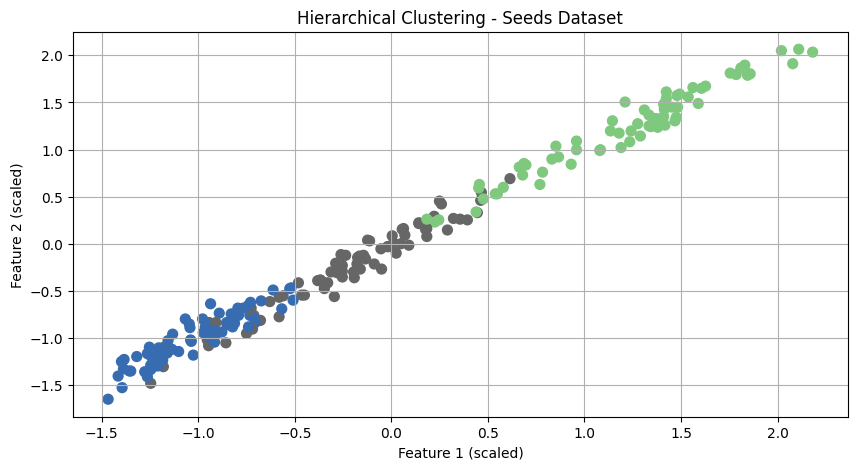

In [62]:
# Visualizing the Clusters basefd on first two columns
# Deciding the figure size
plt.figure(figsize = (10, 5))

plt.scatter(xScaled[:, 0], xScaled[:, 1], c = labels, s= 50, cmap = 'Accent')

# Deciding titles and labels
plt.title("Hierarchical Clustering - Seeds Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")

# Adding grid lines
plt.grid(True)

# Showing te graph
plt.show()
